In [1]:
import torch
import os
import pandas as pd
import fastai.vision.all as fv
from shutil import copy2
from pathlib import Path


In [2]:
torch.cuda.is_available()

True

# Ordenar el dataset

Vi que vienen dos csv's uno para el nombre de las clases y otro para ver si eran de validacion opr lo que tenemos que pasar por la lista de imagenes y luego meterlos en dos folders train y valid. Para eso, primero tenemos que crear los folders donde va a estar el dataset y los folders respectivos de train y test

In [6]:
!pwd

/media/emacc/Seagate Expansion Drive/Redes Neuronales/Redes Neuronales/tarea_carros


Primero, tenemos que leer los csv's que contienen las estructuras de folder y el nombre de las imagenes

In [2]:
image_categories = pd.read_csv('stanford-cars/image_categories.csv'); image_categories

,file,class,valid
0,000001.jpg,1,0
1,000002.jpg,1,0
2,000003.jpg,1,0
3,000004.jpg,1,0
4,000005.jpg,1,0
...,...,...,...
16180,016181.jpg,196,1
16181,016182.jpg,196,1
16182,016183.jpg,196,1
16183,016184.jpg,196,1


In [56]:
names = pd.read_csv('stanford-cars/names.csv'); names

,cat,name
0,1,AM General Hummer SUV 2000
1,2,Acura RL Sedan 2012
2,3,Acura TL Sedan 2012
3,4,Acura TL Type-S 2008
4,5,Acura TSX Sedan 2012
...,...,...
191,192,Volkswagen Beetle Hatchback 2012
192,193,Volvo C30 Hatchback 2012
193,194,Volvo 240 Sedan 1993
194,195,Volvo XC90 SUV 2007


Despues, los voy a pasar a una lista y a eliminar caracteres que podrian causar problemas

In [57]:
folder_names = names.name.unique().tolist()

In [58]:
# hay que quitarle la diagonal a Ram C/V Cargo Van Minivan 2012
folder_names[-23] = folder_names[-23].replace('/','-')


In [59]:
folder_names

['AM General Hummer SUV 2000',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura Integra Type R 2001',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi A5 Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi V8 Sedan 1994',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi TT Hatchback 2011',
 'Audi S6 Sedan 2011',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S4 Sedan 2012',
 'Audi S4 Sedan 2007',
 'Audi TT RS Coupe 2012',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW X5 SUV 2007',
 'BMW X6 SUV 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3

Aqui lo tuve que hacer asi porque por alguna razon, no reemplazaba los valores anteriores con los actualizados, asi que mi soluicion fue crear otra columna, no es lo mejor, pero sirve

In [62]:
names['name2'] = folder_names; names

,cat,name,name2
0,1,AM General Hummer SUV 2000,AM General Hummer SUV 2000
1,2,Acura RL Sedan 2012,Acura RL Sedan 2012
2,3,Acura TL Sedan 2012,Acura TL Sedan 2012
3,4,Acura TL Type-S 2008,Acura TL Type-S 2008
4,5,Acura TSX Sedan 2012,Acura TSX Sedan 2012
...,...,...,...
191,192,Volkswagen Beetle Hatchback 2012,Volkswagen Beetle Hatchback 2012
192,193,Volvo C30 Hatchback 2012,Volvo C30 Hatchback 2012
193,194,Volvo 240 Sedan 1993,Volvo 240 Sedan 1993
194,195,Volvo XC90 SUV 2007,Volvo XC90 SUV 2007


In [63]:
names.iloc[173]

cat                                 174
name     Ram C/V Cargo Van Minivan 2012
name2    Ram C-V Cargo Van Minivan 2012
Name: 173, dtype: object

Ahora creamos los folders en train y valid, para esto **_ya deben de existir el folder carros y dentro de este, los folders train y valid_**

In [64]:
for folder_name in folder_names:
    os.mkdir(f'carros/train/{folder_name}')
    os.mkdir(f'carros/valid/{folder_name}')
    

In [12]:
names[names.cat == 1].name[0]

'AM General Hummer SUV 2000'

In [11]:
image_categories.iloc[1][1]

1

In [59]:
path = os.path.join(os.getcwd(), 'stanford-cars/images/'); path

'/media/emacc/Seagate Expansion Drive/Redes Neuronales/Redes Neuronales/tarea_carros/standford-cars/images/'

In [65]:
names[names['cat'] == image_categories.iloc[90][1]].name2.tolist()[0]

'Acura RL Sedan 2012'

In [21]:
image_categories.iloc[0][0]

'000001.jpg'

In [28]:
!pwd

/media/emacc/Seagate Expansion Drive/Redes Neuronales/Redes Neuronales/tarea_carros


Ahora si podemos iterar sobre los archivos para poder movelos hacia sus folders correponditnes basandome en la informacion de los csv's

In [66]:
for i in range(image_categories.shape[0]):
    filename = image_categories.iloc[i][0]
    folder_name = names[names['cat'] == image_categories.iloc[i][1]].name2.tolist()[0]
    if image_categories.iloc[i][2] == 0:
        copy2(f'stanford-cars/images/{filename}', f'carros/train/{folder_name}/')
    else:
        copy2(f'stanford-cars/images/{filename}', f'carros/valid/{folder_name}/')

In [24]:
copyfile??

Signature: copyfile(src, dst, *, follow_symlinks=True)
Source:   
def copyfile(src, dst, *, follow_symlinks=True):
    """Copy data from src to dst in the most efficient way possible.

    If follow_symlinks is not set and src is a symbolic link, a new
    symlink will be created instead of copying the file it points to.

    """
    sys.audit("shutil.copyfile", src, dst)

    if _samefile(src, dst):
        raise SameFileError("{!r} and {!r} are the same file".format(src, dst))

    file_size = 0
    for i, fn in enumerate([src, dst]):
        try:
            st = _stat(fn)
        except OSError:
            # File most likely does not exist
            pass
        else:
            # XXX What about other special files? (sockets, devices...)
            if stat.S_ISFIFO(st.st_mode):
                fn = fn.path if isinstance(fn, os.DirEntry) else fn
                raise SpecialFileError("`%s` is a named pipe" % fn)
            if _WINDOWS and i == 0:
                file_size = st

Ahora que los tenemos separados en train y valid, podemos empezar a entrenar la red neuronal

# Entrenar la red neuronal

## cargar los datos

In [3]:
carros = Path('carros/')

In [4]:
(carros/'train').ls()

(#196) [Path('carros/train/Acura Integra Type R 2001'),Path('carros/train/Acura RL Sedan 2012'),Path('carros/train/Acura TL Sedan 2012'),Path('carros/train/Acura TL Type-S 2008'),Path('carros/train/Acura TSX Sedan 2012'),Path('carros/train/Acura ZDX Hatchback 2012'),Path('carros/train/AM General Hummer SUV 2000'),Path('carros/train/Aston Martin V8 Vantage Convertible 2012'),Path('carros/train/Aston Martin V8 Vantage Coupe 2012'),Path('carros/train/Aston Martin Virage Convertible 2012')...]

In [5]:
files = fv.get_image_files(carros); files

(#16185) [Path('carros/train/Acura Integra Type R 2001/000424.jpg'),Path('carros/train/Acura Integra Type R 2001/000405.jpg'),Path('carros/train/Acura Integra Type R 2001/000406.jpg'),Path('carros/train/Acura Integra Type R 2001/000407.jpg'),Path('carros/train/Acura Integra Type R 2001/000408.jpg'),Path('carros/train/Acura Integra Type R 2001/000409.jpg'),Path('carros/train/Acura Integra Type R 2001/000410.jpg'),Path('carros/train/Acura Integra Type R 2001/000411.jpg'),Path('carros/train/Acura Integra Type R 2001/000412.jpg'),Path('carros/train/Acura Integra Type R 2001/000413.jpg')...]

In [6]:
fv.doc(fv.get_image_files)

get_image_files(path, recurse=True, folders=None)
Get image files in `path` recursively, only in `folders`, if specified.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [7]:
files[0]

Path('carros/train/Acura Integra Type R 2001/000424.jpg')

In [9]:
def load_data(folder, img_size, batch_size):
    tfms = fv.aug_transforms(#flip_vert = True, #,me di cuenta muy tarde esto :C
                             flip_vert = False,
                            do_flip = True,
                             max_rotate= 30,
#                              max_rotate = 360, # que pasa si ahora si le pongo 360
#                              max_rotate = 45,
                             max_lighting=0.25,
                             max_zoom=1.1,
                             max_warp=0.2)

    data = fv.DataBlock(blocks = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y = fv.parent_label,
                        splitter = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms = tfms
                        )
    return data.dataloaders(folder, bs = batch_size)

In [10]:
data = load_data(carros, img_size=256, batch_size = 128) #mi batchsize defaut va a ser casi siempre 128, si no viene indicado en el nombre del modelo entonces es eso

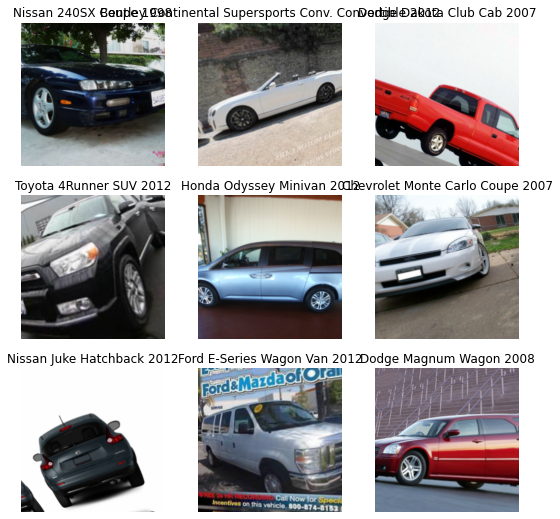

In [11]:
data.show_batch()

## Entrenar
## Primer intento

In [11]:
learner = fv.cnn_learner(data, fv.resnet18, metrics=fv.accuracy)

In [12]:
learner.summary()

Sequential (Input shape: ['128 x 3 x 256 x 256'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               128 x 64 x 128 x 12  9,408      False     
________________________________________________________________
BatchNorm2d          128 x 64 x 128 x 12  128        True      
________________________________________________________________
ReLU                 128 x 64 x 128 x 12  0          False     
________________________________________________________________
MaxPool2d            128 x 64 x 64 x 64   0          False     
________________________________________________________________
Conv2d               128 x 64 x 64 x 64   36,864     False     
________________________________________________________________
BatchNorm2d          128 x 64 x 64 x 64   128        True      
________________________________________________________________
ReLU                 128 x 64 x 64 x 64   0          False     
________________________________________________

SuggestedLRs(lr_min=0.005754399299621582, lr_steep=0.015848932787775993)

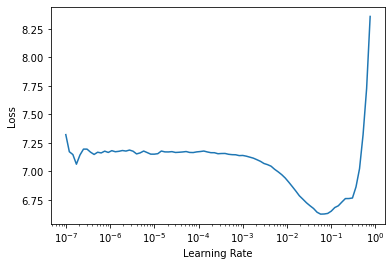

In [57]:
learner.lr_find()

In [59]:
learner.fit_one_cycle(6, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.409838,2.771139,0.339137,00:32
1,3.172001,2.684906,0.348713,00:31
2,2.925768,2.398897,0.393608,00:31
3,2.637177,2.021203,0.477801,00:31
4,2.315075,1.835464,0.526551,00:32
5,2.120587,1.772930,0.543962,00:31


In [14]:
learner.fit_one_cycle(10, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.794206,4.025924,0.139286,10:08
1,4.665513,3.663132,0.205571,00:33
2,4.051878,3.057488,0.276458,00:33
3,3.440983,2.626501,0.351324,00:33
4,3.003440,2.265704,0.417112,00:32
5,2.657774,2.012856,0.482030,00:33
6,2.397962,1.808938,0.535754,00:33
7,2.150143,1.641073,0.574307,00:33
8,1.943541,1.590694,0.586867,00:34
9,1.845227,1.569884,0.592588,00:33


In [15]:
learner.save('modelo_1') #vamos a guardarlo porque es mi mejor intento

Path('models/modelo_1.pth')

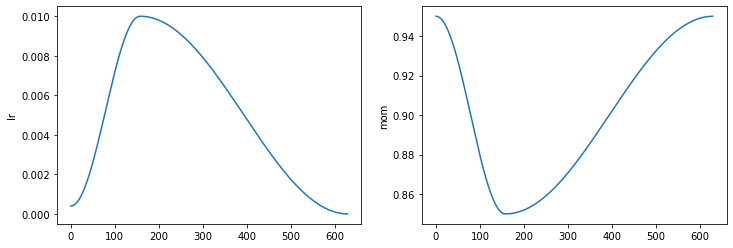

In [61]:
learner.recorder.plot_sched()

Esta es la corrida inicial del modelo con los parametros como en los del ejemplo, menos el de batch size, para ver una corrida inical, despues iontentare correr el modelo resnet30 y si me da la VRAM (y el tiempo) resnet50

Con la primera epoca se tardo un chorro, no tenog idea de porque, pero las demas ya no tanto. Igual con el lr_find, no se si es algo de mi computadora o de plano esto es computacionalmente mas pesado de lo que yo esperaba. Ya vi porque era, era porque habia dejado que rotaran 360 grados las imagenes y pues asi no se puede, intente con 45 pero me estoy dando cuenta de que creo que tampoco es muy buna esa rotacion, igual intentare con otros parametros para ver como puede mejorar esto. Con estos paremtros 'tuneados' alcance a llegar a 0.449322 de accuracy, lo cual es media mala, pero si le pongo 6 epocas en lugar de 3 tal vez pueda llegar la doble. No llegue al doble pero si a 0.54 de accuracy sera cuestion de cambiar el modelo?.  Al parecer si habia imagenes que estaban volteadas entonces voy a intentar cambiar a 90 grados de rotacion antes de intentar otra cosa. No funciono y al parecer reducir las rotaciones puede servir asi que lo restringimos mas. Con estas nuevas restricciones y tomando una lr de 1e-2, mejoro el accuracy con 6 epocas lo que me lleva a tal vez aumentar el numero de epocas. Llegue casi al mismo accuracy que lo reportado anteriormente 0.54 asi que subiendo las epocas, podre mejorar? Resulta que si, con 10 epocas, pude llegar al entre el 59% y 61% de accuracy. Se ve que si sigo subiendo las epocas, el accuracy no va asubir mucho porque en las ultimas dos corridas subio casi nada

Esto es terrible porque deje que modificara la rotacion lo cual pues no es libre porque no voy a ver un auto de cabeza\

Ya vemos que se ve mejor, falla solo en agunos. Podria intentar entrenar en todas las capas, pero primero quiero ver si cambiando el modelo, podemos aumentar de accuracy

In [63]:
learner.validate()

(#2) [1.463120698928833,0.6112423539161682]

## hacer el unfreeze

Ahora vamos a tratar de entrenar hacuendo el unfreeze de las capas preentrenadas de la red neuronal

In [16]:
learner.unfreeze()

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=1.2022644114040304e-05)

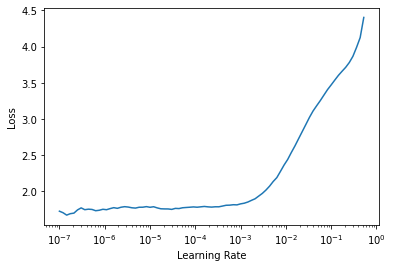

In [17]:
learner.lr_find()

Ok... este lr_find se ve medio raro, pero podemos ver que el minimo que puedo usar es 1e-7, igual esta corrida es seguir corriendo con el modelo que se supone que preentrene antes

In [18]:
learner.fit_one_cycle(10, lr_max=1e-7)

epoch,train_loss,valid_loss,accuracy,time
0,1.795545,1.567460,0.593085,00:37
1,1.816500,1.568886,0.590598,00:37
2,1.819012,1.564345,0.592712,00:38
3,1.809087,1.564497,0.593210,00:38
4,1.791698,1.566624,0.592961,00:37
5,1.786446,1.566272,0.593085,00:36
6,1.790295,1.563119,0.594453,00:35
7,1.798918,1.570046,0.592215,00:36
8,1.784990,1.566295,0.593210,00:35
9,1.778564,1.568155,0.593210,00:36


Vemos que la accuracy no mejoro mucho del todo, puede ser que estos sean los limites del modelo, lo cual puede llegar a indicarme que tengo que cambiar de modelo o incrementar el batch size, esto ultimo puede representar un problema por la VRAM, actualmente tengo 8GB de VRAM y esto simeplemente ya me esta consumiendo 6, (Al fin algo que no es Minecraft RTX que pone a sufrir a mi grafica)

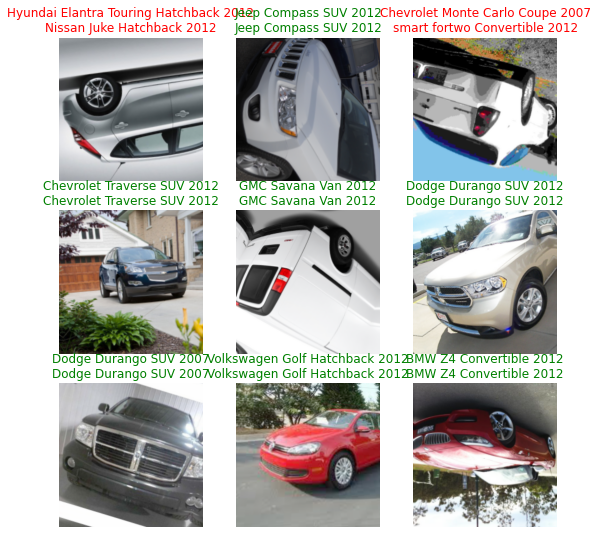

In [20]:
learner.show_results(ds_idx=3, dl=data.train,shuffle=True)

In [21]:
learner.validate()

(#2) [1.5681549310684204,0.5932098031044006]

In [22]:
learner.save('primer_intento_resnet18_10epoch_unfreezed')

Path('models/primer_intento_resnet18_10epoch_unfreezed.pth')

## Y si cambiamos de modelo?
### resnet 34
De acuerdo a la documentacion, hay distintos modelos de resnet siendo el mas basico el resnet18 ,por lo que podemos intentar con el siguente el cual es resnet34

In [11]:
learner = fv.cnn_learner(data, fv.resnet34, metrics=fv.accuracy)

In [12]:
learner.summary()

Sequential (Input shape: ['128 x 3 x 256 x 256'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               128 x 64 x 128 x 12  9,408      False     
________________________________________________________________
BatchNorm2d          128 x 64 x 128 x 12  128        True      
________________________________________________________________
ReLU                 128 x 64 x 128 x 12  0          False     
________________________________________________________________
MaxPool2d            128 x 64 x 64 x 64   0          False     
________________________________________________________________
Conv2d               128 x 64 x 64 x 64   36,864     False     
________________________________________________________________
BatchNorm2d          128 x 64 x 64 x 64   128        True      
________________________________________________________________
ReLU                 128 x 64 x 64 x 64   0          False     
________________________________________________

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.019054606556892395)

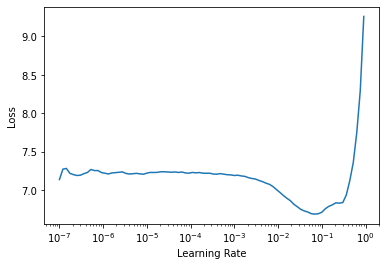

In [15]:
learner.lr_find()

In [17]:
learner.fit_one_cycle(10, lr_max=2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.023630,1.828277,0.517473,00:40
1,2.511153,3.820617,0.211541,00:39
2,2.801512,3.284209,0.261535,00:39
3,2.715694,2.530785,0.363885,00:39
4,2.546533,2.127216,0.461510,00:41
5,2.291954,1.733046,0.546201,00:39
6,2.034129,1.497174,0.597687,00:40
7,1.781517,1.316965,0.643825,00:40
8,1.556604,1.228092,0.672678,00:39
9,1.448250,1.225891,0.671558,00:40


Al usar otros parametros, ya podemos ver que la accuracy mejoro demasiado, de un pormodeio de 60% a ahora casi 67%! Lo qu eme lleva a ver si usando el unfreeze en esto, podemos subir un poco mas

In [18]:
learner.unfreeze()

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=2.2908675418875646e-06)

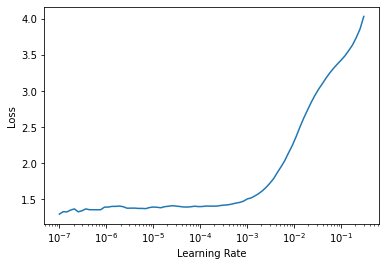

In [19]:
learner.lr_find()

Se parencen las graficas a la de la vez anterior, por lo que no se si valga mucho la pena reintentarlo. Pero como tengo tiempo, lo voy a hacer

In [20]:
learner.fit_one_cycle(6, lr_max=1e-7) #use 6 epocas porque tengo el presentimiento de que se va a comportar como el pasado 

epoch,train_loss,valid_loss,accuracy,time
0,1.367416,1.225393,0.671434,00:46
1,1.381340,1.223832,0.672056,00:47
2,1.377144,1.220125,0.674046,00:47
3,1.397231,1.220806,0.672802,00:47
4,1.393808,1.223150,0.672553,00:46
5,1.398147,1.222691,0.673672,00:47


In [21]:
learner.save('segundo_intento_resnet34_10epocas_unfreezed_6epocas')

Path('models/segundo_intento_resnet34_10epocas_unfreezed_6epocas.pth')

Como predije, el comportamiento es parecido pero, ya tenemos un poco mas de accuracy, 67%. Viendo esto, lo que se me oucurre es seguir modificando el modelo o puedo modificar el batchsize

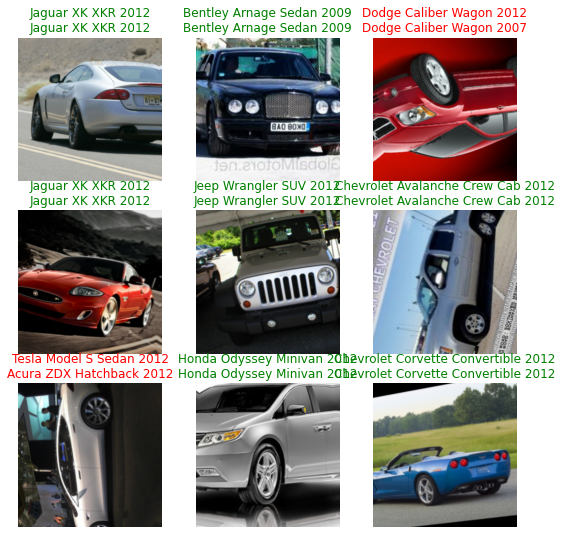

In [22]:
learner.show_results(ds_idx=3, dl=data.train,shuffle=True)

In [23]:
learner.validate()

(#2) [1.2226914167404175,0.6736724376678467]

Ahora intentare poner la rotacion en 360 grados para ver que tal se comporta

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.013182567432522774)

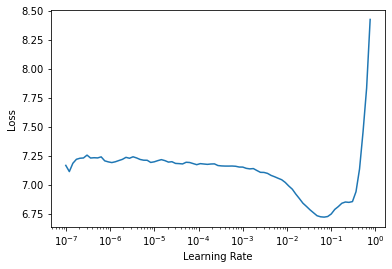

In [13]:
learner.lr_find()

In [15]:
learner.fit_one_cycle(10, lr_max = 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,6.315604,4.432949,0.091282,06:36
1,4.957942,4.039017,0.169009,00:37
2,4.132341,3.226938,0.256187,00:36
3,3.461648,2.675934,0.341251,00:36
4,2.997585,2.347210,0.416864,00:37
5,2.618169,2.097426,0.464246,00:37
6,2.329914,1.896172,0.509016,00:36
7,2.030407,1.700698,0.560129,00:37
8,1.847730,1.637844,0.575302,00:36
9,1.714372,1.623901,0.577167,00:36


Hasta me salio peor, y vienod que no cambio mucho en las ultimas epocas, creo que no vale la pena hacer el unfreeze. Pero que tal 45. Igual no me salio

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.013182567432522774)

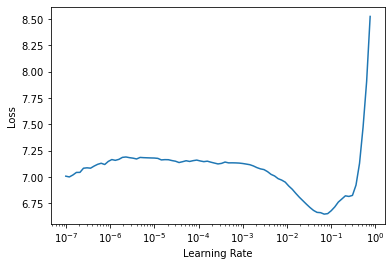

In [23]:
learner.lr_find()

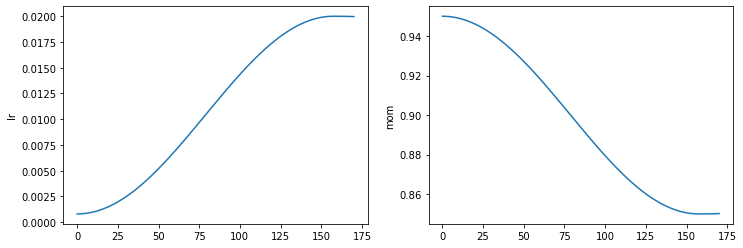

In [28]:
learner.recorder.plot_sched()

In [29]:
learner.fit_one_cycle(10, lr_max = 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.859842,2.315201,0.428305,00:37
1,2.624002,2.004498,0.501803,00:38
2,2.395539,1.877304,0.521826,00:40
3,2.192302,1.691062,0.557766,00:41
4,2.013575,1.635298,0.575426,00:40
5,1.865168,1.492817,0.612237,00:39
6,1.746978,1.428488,0.624549,00:39
7,1.684140,1.405052,0.630892,00:39
8,1.589776,1.382590,0.634747,00:39
9,1.549007,1.383623,0.634747,00:39


In [30]:
learner.unfreeze()

SuggestedLRs(lr_min=1.58489319801447e-07, lr_steep=5.754399353463668e-06)

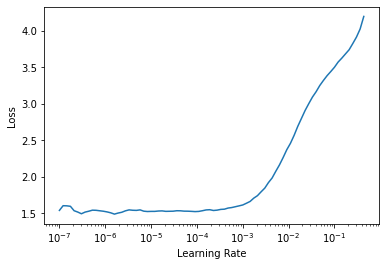

In [31]:
learner.lr_find()

In [34]:
learner.fit_one_cycle(10, lr_max = 1e-7)

epoch,train_loss,valid_loss,accuracy,time
0,1.520700,1.379416,0.633752,00:48
1,1.544496,1.383397,0.634374,00:47
2,1.529879,1.386782,0.634623,00:47
3,1.528422,1.381615,0.635742,00:48
4,1.532181,1.382480,0.635369,00:48
5,1.532200,1.381235,0.633503,00:47
6,1.537665,1.382578,0.634374,00:47
7,1.522940,1.384292,0.633379,00:47
8,1.532406,1.381423,0.635244,00:47
9,1.541496,1.381179,0.634623,00:47


se quedo en 63% por lo que vamos a regresar a la rotacion que tenia y correr el experimento de nuevo

SuggestedLRs(lr_min=0.005754399299621582, lr_steep=0.019054606556892395)

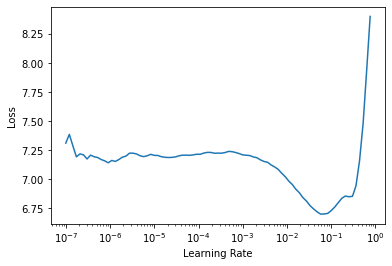

In [13]:
learner.lr_find()

In [18]:
learner.fit_one_cycle(10, lr_max = 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.833412,1.501062,0.599801,00:37
1,2.098793,1.982157,0.486258,00:38
2,2.357482,2.023872,0.473573,00:38
3,2.356943,1.933132,0.500808,00:37
4,2.170226,1.749868,0.533143,00:37
5,1.943372,1.429900,0.613978,00:37
6,1.738966,1.319941,0.641587,00:37
7,1.553369,1.264202,0.654769,00:37
8,1.450343,1.230753,0.665216,00:37
9,1.375949,1.221833,0.668449,00:37


Podemos opbservar que estos son los limites donde yo puedo optimizar mi modelo. Cambiar al siguente modelo, sera mala idea porque ya me estoy quedando sin VRAN, por lo que, me convendria tratar de bajar el batchsize

In [20]:
learner.save('tercer_intento_10epoch_resnet34')

Path('models/tercer_intento_10epoch_resnet34.pth')

No cambie el flip vert pero si lo quito, cahcne y podamos tener mejor accuracy, asi que lo volvere a intentar con resnet18 primero a ver que tal

In [22]:
learner = fv.cnn_learner(data, fv.resnet18, metrics=fv.accuracy)

In [13]:
learner.summary()

Sequential (Input shape: ['128 x 3 x 256 x 256'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               128 x 64 x 128 x 12  9,408      False     
________________________________________________________________
BatchNorm2d          128 x 64 x 128 x 12  128        True      
________________________________________________________________
ReLU                 128 x 64 x 128 x 12  0          False     
________________________________________________________________
MaxPool2d            128 x 64 x 64 x 64   0          False     
________________________________________________________________
Conv2d               128 x 64 x 64 x 64   36,864     False     
________________________________________________________________
BatchNorm2d          128 x 64 x 64 x 64   128        True      
________________________________________________________________
ReLU                 128 x 64 x 64 x 64   0          False     
________________________________________________

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.013182567432522774)

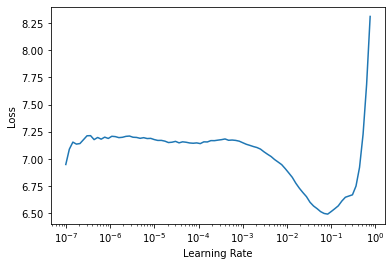

In [14]:
learner.lr_find()

In [18]:
learner.fit_one_cycle(12, lr_max = 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.589324,3.608073,0.188036,00:32
1,4.174476,3.940643,0.209302,00:32
2,3.625248,3.168685,0.250591,00:32
3,3.005930,2.506987,0.370476,00:31
4,2.629603,2.255122,0.425445,00:31
5,2.355438,2.080262,0.463126,00:31
6,2.108484,2.079509,0.456784,00:32
7,1.881760,1.554350,0.588857,00:31
8,1.635251,1.341274,0.637359,00:31
9,1.441999,1.240589,0.664097,00:31


Definitivamente sin el flip ya me dio mejor accuracy que con los demas modelos, esto quiere decir que podemos hacer el unfreeze para ver si podemos mejorar con esto

In [19]:
learner.unfreeze()

SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=6.309573450380412e-07)

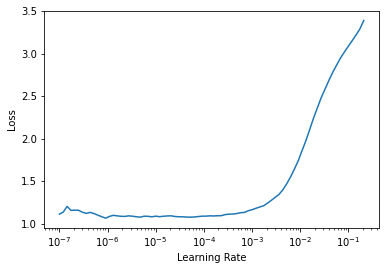

In [20]:
learner.lr_find()

In [21]:
learner.fit_one_cycle(10, lr_max = 7e-8)

epoch,train_loss,valid_loss,accuracy,time
0,1.130704,1.159213,0.684989,00:35
1,1.115544,1.156376,0.684243,00:36
2,1.109576,1.156106,0.683995,00:35
3,1.106762,1.158698,0.685860,00:35
4,1.108133,1.155721,0.685487,00:35
5,1.118547,1.157429,0.686233,00:36
6,1.110042,1.152536,0.685238,00:35
7,1.112362,1.153332,0.686731,00:35
8,1.100032,1.153551,0.685114,00:35
9,1.117113,1.155385,0.685984,00:36


Vemos que ya me dio mas acurracy que los modelos anteriores que he probado, si le movemos un poco a la lr tal vez pueda llegar a 70

In [23]:
learner = fv.cnn_learner(data, fv.resnet18, metrics=fv.accuracy)

In [24]:
learner.fit_one_cycle(12, lr_max = 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,6.088237,4.015714,0.141525,00:32
1,4.411340,2.921224,0.303569,00:31
2,3.600484,2.746707,0.340754,00:31
3,3.003321,2.218277,0.429797,00:32
4,2.523256,1.984746,0.482651,00:32
5,2.181601,1.801875,0.532521,00:32
6,1.920141,1.600382,0.565850,00:31
7,1.708987,1.416324,0.622684,00:31
8,1.496176,1.297703,0.652406,00:31
9,1.316929,1.206710,0.668698,00:32


In [25]:
learner.fit_one_cycle(5, lr_max = 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.301969,1.962742,0.500062,00:32
1,1.904187,2.126474,0.462132,00:32
2,1.818736,1.541205,0.584877,00:31
3,1.502167,1.203199,0.672304,00:32
4,1.271205,1.182340,0.677901,00:31


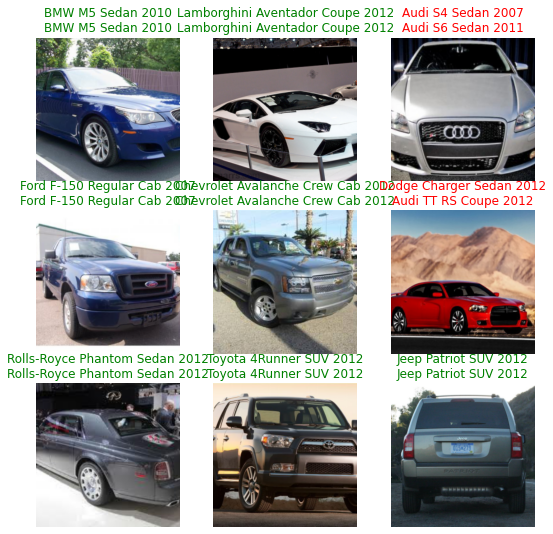

In [26]:
learner.show_results()

In [ ]:
interp = fv.ClassificationInterpretation.from_learner(learner) # esta linea tardo mas, se me murio el kernel

In [ ]:
interop.plot_top_losses(9)

Con lo anterior puedo concluir que puedo tener el mismo comportamiento si utilizo resnet34 lo cual me va a dar una mejor accuracy. 